In [1]:
from segmentandoDatasets import segmentando_datasets
segmentando_datasets(10000,10000,10000)

DataFrame do local PUC salvo como: Datasets_csv/df_PUC.csv
DataFrame do local PUC:
                                      caminho_imagem    classe
0  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
1  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
2  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
3  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
4  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty


DataFrame do local UFPR04 salvo como: Datasets_csv/df_UFPR04.csv
DataFrame do local UFPR04:
                                      caminho_imagem    classe
0  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty
1  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty
2  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty
3  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
4  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty


DataFrame do local UFPR05 salvo como: Datasets_csv/df_UFPR05.csv


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
import numpy as np
from tensorflow.keras.optimizers import Adam
import keras 


2024-09-04 17:01:00.410774: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 17:01:00.424249: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 17:01:00.428476: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-04 17:01:00.439438: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-04 17:01:01.239725: W tensorflow/compiler/tf2

In [3]:
from preprocessamento import *

csv_file = 'Datasets_csv/df_PUC.csv'
train, teste, val, _, _, _ = preprocessamento(csv_file, 0.6, 0.2, 0.2, True)

Found 6000 validated image filenames.
Found 2000 validated image filenames.
Found 2000 validated image filenames.


In [4]:
# Tamanho da entrada
input_img = Input(shape=(256, 256, 3))

# Camadas do encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Camadas do decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Definir o modelo
autoencoder = Model(input_img, decoded)

I0000 00:00:1725480062.124611   47066 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1725480062.160599   47066 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1725480062.160765   47066 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1725480062.161898   47066 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [5]:

checkpoint_path = 'weights_parciais/weights-improvement-{epoch:02d}-{loss:.2f}.weights.h5'
cp_callback = ModelCheckpoint(filepath=checkpoint_path, 
                                  save_weights_only=True, 
                                  monitor='loss',
                                  mode='max', 
                                  save_best_only=True, 
                                  verbose=1)

In [6]:
autoencoder.compile(optimizer='Adam', loss='mean_squared_error')

history = autoencoder.fit(train,
                epochs=10,
                batch_size=32,
                shuffle=True,
                callbacks=[cp_callback],
                validation_data=(val))

Epoch 1/10


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725480066.498262   47150 service.cc:146] XLA service 0x7501040046c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725480066.498280   47150 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1660, Compute Capability 7.5
2024-09-04 17:01:06.563768: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-04 17:01:06.750799: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
E0000 

  3/188 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - loss: 0.0586

I0000 00:00:1725480072.312469   47150 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.0331
Epoch 1: loss improved from -inf to 0.01878, saving model to weights_parciais/weights-improvement-01-0.02.weights.h5
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 181ms/step - loss: 0.0330 - val_loss: 0.0037
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0035
Epoch 2: loss did not improve from 0.01878
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - loss: 0.0034 - val_loss: 0.0024
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0021
Epoch 3: loss did not improve from 0.01878
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0017
Epoch 4: loss did not improve from 0.01878
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0015
Epoch 5: loss did not improve from 0.01878
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - loss: 0.0015 - val_loss: 0.

<Axes: >

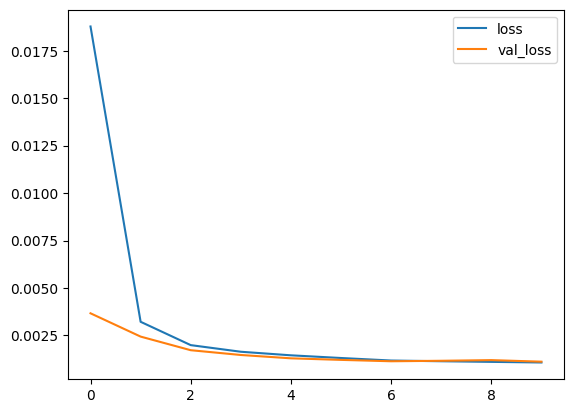

In [7]:
pd.DataFrame(history.history).plot()

In [8]:
autoencoder.save("Modelos_keras/Autoencoder.keras")
autoencoder.save_weights("weights_finais/Autoencoder.weights.h5")

In [9]:
autoencoder.load_weights("weights_finais/Autoencoder.weights.h5")

In [10]:
encoder = Model(input_img, encoded)
decoder = Model(encoded, decoded)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_original_and_reconstructed(model, X_val, num_images=5):
    """
    Plota as imagens originais e suas versões reconstruídas pelo autoencoder.
    
    Parâmetros:
        model (keras.Model): O modelo do autoencoder treinado.
        X_val (numpy.ndarray): Conjunto de dados de validação.
        num_images (int): Número de imagens a serem plotadas.
    """
    plt.figure(figsize=(12, 6))

    for i in range(num_images):
        # Seleciona uma imagem aleatória do conjunto de validação
        image_index = np.random.randint(0, len(X_val))
        original_image = X_val[image_index]

        # Passa a imagem original pelo autoencoder para obter a imagem reconstruída
        reconstructed_image = model.predict(original_image.reshape(1, 256, 256, 3))[0]

        # Plota a imagem original e a reconstruída
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original_image)
        plt.title("Original")
        plt.axis("off")

        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructed_image)
        plt.title("Reconstruída")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

In [12]:
X_val, _ = next(val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


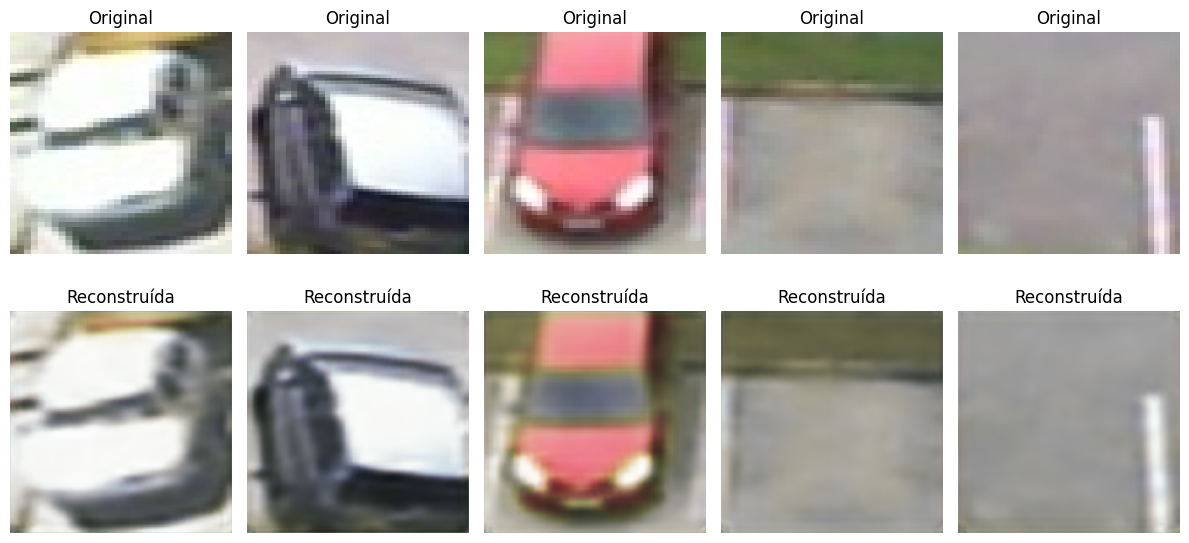

In [13]:
plot_original_and_reconstructed(autoencoder, X_val)